In [147]:
import requests
from bs4 import BeautifulSoup
from lxml import etree
import json
import re
import multiprocessing
# import xlwt
import time
import pandas as pd
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'

In [10]:
#总分榜单
jinjiang = 'https://www.jjwxc.net/topten.php?orderstr=7&t=1'
#'https://www.jjwxc.net/bookbase_slave.php?t=0&booktype=&opt=&page=1&endstr=true&orderstr=4'

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                        'AppleWebKit/537.36 (KHTML, like Gecko) '
                        'Chrome/92.0.4515.107 Safari/537.36 Edg/92.0.902.55'}
response = requests.get(jinjiang, headers=header)
print(response.status_code)

200


In [11]:
# change to Chinese
response.encoding = response.apparent_encoding

print(response.text)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
    <head>
        <meta http-equiv="Content-Type" content="text/html; charset=gb18030"/>
        <meta http-equiv="X-UA-Compatible" content="IE=EmulateIE7"/>
                    <meta name="description" content="总分排行榜_晋江文学城
晋江文学城总分排行榜,是网站小说作品总积分排行榜。"/>
            <meta name="keywords" content="晋江文学城，作品总分排行，言情小说排行，纯爱小说排行，衍生小说排行，轻小说排行">
            <title>晋江文学城[总分排行榜]_按规定时间内作品积分排序</title>
                <link href="//s9-static.jjwxc.net/css/index.css" rel="stylesheet" type="text/css"/>
        <style>
            .current {font-weight: bold;color: red;}
        </style>
    </head>
    <body topmargin="0">
                        <link href="//static.jjwxc.net/css/channel_2010/index2010.css?ver=2022070803"
      rel="stylesheet"
      type="text/css"
      media="screen"/>
<style>
    #showNovelTro {position: absolute;dis

In [116]:
# 清洗+提取信息
# Xpath
htmls = etree.HTML(response.text)
# book_name = htmls.xpath('//a[@class="tooltip"]/text()')
# print(book_name)

# print(htmls.xpath('//tbody//td//a/text()')) # author + title

# print(htmls.xpath('//tbody//td[2]//a/@href')) #
# print(htmls.xpath('//tbody//td[2]//a/@title')) # author
ls_author = htmls.xpath('//tbody//td[2]//a/@title')
ls_author_href = htmls.xpath('//tbody//td[2]//a/@href')

# print(htmls.xpath('//a[@class="tooltip"]/@rel')) #
# print(htmls.xpath('//a[@class="tooltip"]/@title')) # title
# print(htmls.xpath('//a[@class="tooltip"]/@href')) #
ls_title = htmls.xpath('//a[@class="tooltip"]/@title')
ls_title_href = htmls.xpath('//a[@class="tooltip"]/@href')
ls_rel = htmls.xpath('//a[@class="tooltip"]/@rel')

# print(htmls.xpath('//tbody//td[@align="center"][3]/text()')) # style (轻松 or 正剧)
# print(htmls.xpath('//tbody//td[@align="center"][5]/text()')) # time
ls_style = htmls.xpath('//tbody//td[@align="center"][3]/text()')
ls_time = htmls.xpath('//tbody//td[@align="center"][5]/text()')

# print(htmls.xpath('//tbody//td[@align="right"][1]/text()')) # words
# print(htmls.xpath('//tbody/tr/td[8]/text()')) # credits
ls_words = htmls.xpath('//tbody//td[@align="right"][1]/text()')
ls_credits = htmls.xpath('//tbody/tr/td[8]/text()')[2:]

In [119]:
# print(htmls.xpath('//tbody/tr/td[8]/text()')[2:]) # credits

In [101]:
# bs = BeautifulSoup(response.text, 'lxml')
# print(bs)

# 正则表达式吧。。。。

In [118]:
# create pandas frame

dic = {'author': ls_author, 'author_link': ls_author_href,
       'title': ls_title, 'book_link': ls_title_href, 'intro': ls_rel,
       'time': ls_time, 'style': ls_style, 'words_num': ls_words, 'credits': ls_credits}
df = pd.DataFrame(dic)
print(df)

    author                    author_link       title  \
0      木苏里  oneauthor.php?authorid=966799        全球高考   
1      木苏里  oneauthor.php?authorid=966799          某某   
2       淮上  oneauthor.php?authorid=294665          破云   
3       淮上  oneauthor.php?authorid=294665       破云2吞海   
4      木苏里  oneauthor.php?authorid=966799          判官   
..     ...                            ...         ...   
195    春风遥  oneauthor.php?authorid=976658  天雷能有什么坏心思呢   
196    青梅酱  oneauthor.php?authorid=423251     电竞魔王集结营   
197     巫哲  oneauthor.php?authorid=570049     我就是来借个火   
198    林知落  oneauthor.php?authorid=494127    虐渣剧情引起舒适   
199     龙柒  oneauthor.php?authorid=729526     想飞升就谈恋爱   

                       book_link  \
0    onebook.php?novelid=3419133   
1    onebook.php?novelid=3173202   
2    onebook.php?novelid=3395943   
3    onebook.php?novelid=3617495   
4    onebook.php?novelid=3515679   
..                           ...   
195  onebook.php?novelid=6013775   
196  onebook.php?novelid=40

In [120]:
# write to excel

# df.to_excel('dammei.xlsx',index=False)

数据分析
1. 整体分析

In [121]:
df

,author,author_link,title,book_link,intro,time,style,words_num,credits
0,木苏里,oneauthor.php?authorid=966799,全球高考,onebook.php?novelid=3419133,全球大型高危险性统一考试，简称全球高考。真身刷题，及格活命。考制一月一改革，偶尔随机。<br...,2018-10-10 20:03:00,轻松,589514,"34,488,274,944 \r\n ..."
1,木苏里,oneauthor.php?authorid=966799,某某,onebook.php?novelid=3173202,盛望搬进了白马弄堂的祖屋院子，一并搬进来的还有他爸正在交往的女人。<br>他爸指着那个女人的...,2019-08-07 18:56:00,正剧,438115,"33,815,836,672 \r\n ..."
2,淮上,oneauthor.php?authorid=294665,破云,onebook.php?novelid=3395943,<br>城市天空，诡云奔涌<br>三年前恭州市的缉毒行动中，因总指挥江停判断失误，现场发生...,2017-12-15 12:36:06,正剧,817364,"30,396,723,200 \r\n ..."
3,淮上,oneauthor.php?authorid=294665,破云2吞海,onebook.php?novelid=3617495,<br>那些窥探的触角隐藏在互联网浪潮中，无处不在，生生不息，正逐渐将现代社会的每个角落淹...,2019-05-10 16:25:13,正剧,855167,"29,909,430,272 \r\n ..."
4,木苏里,oneauthor.php?authorid=966799,判官,onebook.php?novelid=3515679,花里胡哨的“菜鸡”x住着豪宅的穷比<br>判官这一脉曾经有过一位祖师爷，声名显赫现在却无人敢...,2020-04-27 22:38:38,轻松,539210,"29,650,282,496 \r\n ..."
...,...,...,...,...,...,...,...,...,...
195,春风遥,oneauthor.php?authorid=976658,天雷能有什么坏心思呢,onebook.php?novelid=6013775,【全文完】<br>杜圣兰，修真界最顶尖的天才，三岁凝剑气，五岁唤起武道之碑的共鸣，十岁独自前...,2021-11-10 10:25:00,轻松,765958,"4,620,838,912 \r\n ..."
196,青梅酱,oneauthor.php?authorid=423251,电竞魔王集结营,onebook.php?novelid=4079467,【陆商出版名《炙热》第一册已预售，第二册及其他无删信息可见围脖@青梅酱酱酱ya】<br>首席...,2020-06-23 12:00:00,轻松,781144,"4,620,994,048 \r\n ..."
197,巫哲,oneauthor.php?authorid=570049,我就是来借个火,onebook.php?novelid=2731618,写鬼故事的大叔，碰到一个自称是鬼的二逼青年。<br>此处加粗（非灵异也不恐怖）加粗结束<br...,2016-05-08 10:00:00,轻松,346718,"4,618,099,200 \r\n ..."
198,林知落,oneauthor.php?authorid=494127,虐渣剧情引起舒适,onebook.php?novelid=3993662,小广告：新坑《工业修真[直播]》开啦，请大家移步支持！感谢！！<br>———————————...,2020-03-05 12:00:00,轻松,480373,"4,607,836,160 \r\n ..."


In [141]:
# author

df_author = df[['author_link', 'author']].groupby('author').agg('count')

df_author1 = df_author.loc[df_author['author_link'] > 1]
df_author1
# .plot(kind='bar')

,author_link
author,
priest,9
一十四洲,4
公子于歌,2
北南,4
即墨遥,2
吕天逸,3
巫哲,10
微风几许,2
拉棉花糖的兔子,7


In [151]:
df_author1.sort_values('author_link', inplace=True, ascending=False)

C:\Users\Julia\AppData\Local\Temp\ipykernel_5080\1355188211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_author1.sort_values('author_link', inplace=True, ascending=False)


<AxesSubplot:xlabel='author'>

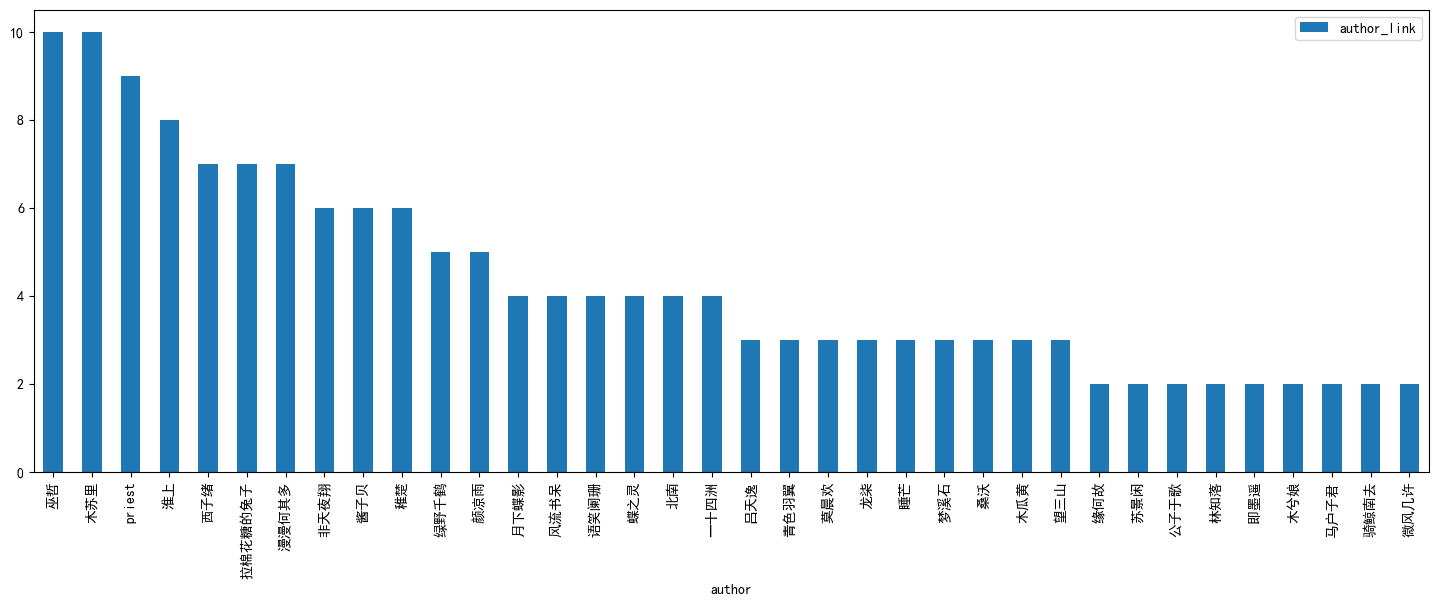

In [152]:
df_author1.plot(kind='bar', figsize=(18, 6))

In [161]:
# style

df_style = df[['style', 'title']].groupby('style').agg('count')
df_style

,title
style,
正剧,66
爆笑,5
轻松,129


<AxesSubplot:xlabel='[1, 2, 3]'>

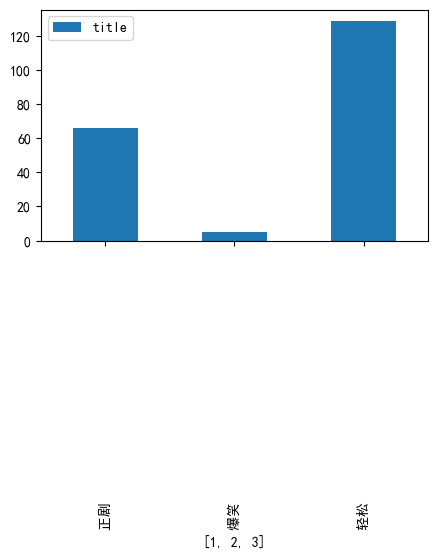

In [176]:
df_style.plot(kind='bar', figsize=(5, 3), xlabel=['1', '2', '3'])

In [167]:
# time

df_time = df[['time']]
df_time['year'] = df_time['time'].str.extract('(^\d{4})', expand=True)
df_year = df_time.groupby('year').agg('count')
df_year

C:\Users\Julia\AppData\Local\Temp\ipykernel_5080\1505416110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['year'] = df_time['time'].str.extract('(^\d{4})', expand=True)


,time
year,
2012,1
2013,2
2014,4
2015,12
2016,15
2017,22
2018,37
2019,38
2020,39


<AxesSubplot:xlabel='year'>

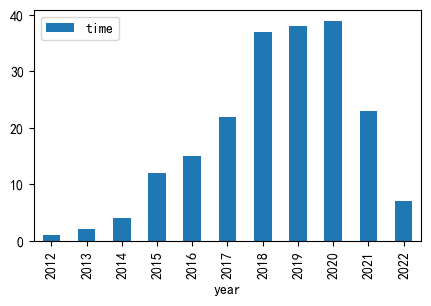

In [171]:
df_year.plot(kind='bar', figsize=(5, 3))

0      589514 
1      438115 
2      817364 
3      855167 
4      539210 
        ...   
195    765958 
196    781144 
197    346718 
198    480373 
199    832858 
Name: words_num, Length: 200, dtype: object

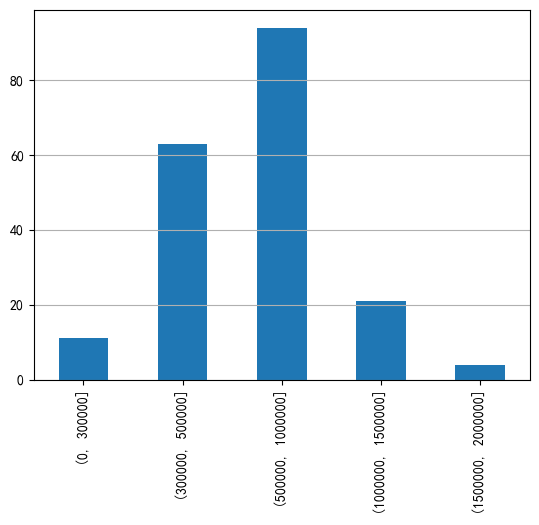

In [193]:
from matplotlib import pyplot as plt

ls = []
for num in ls_words:
    # print(num)
    # print(int(num))
    ls.append(int(num))

# words
# 组间距离
bins = [0, 300000, 500000, 1000000, 1500000, 2000000]
agesgroup = pd.cut(ls, bins)
nn = agesgroup.value_counts()
nn.plot(kind='bar')
plt.grid(axis="y")

2. 分作者分析